<a href="https://colab.research.google.com/github/Ash-The-Bash/Ashish-P/blob/main/QpsQssQsun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file=pd.read_csv('/content/drive/MyDrive/data_25-Sep-2021.csv')

In [ ]:
#lets find the value of 'm'
rho=1000;
v=file['FT1_MES']
m=v*rho;
print(m);

0       2.531829
1       2.965857
2       2.604167
3       2.748843
4       2.748843
          ...   
1433    3.038194
1434    3.038194
1435    2.531829
1436    2.893518
1437    2.748843
Name: FT1_MES, Length: 1438, dtype: float64


In [ ]:
#lets import numpy to use interpolation
import numpy as np


In [ ]:
#lets calculate DeltaTp for first data
DeltaTp= file['TT1_C_MES'] - file['TT1_F_MES']
print(DeltaTp);

0       0.799999
1       0.799999
2       0.799999
3       0.799999
4       0.799999
          ...   
1433    0.500000
1434    0.500000
1435    0.500000
1436    0.600000
1437    0.500000
Length: 1438, dtype: float64


In [ ]:
#lets define T Xq and CP and calculate Vq
T=[-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
cp=[3.26,3.34,3.42,3.50,3.58,3.66,3.74,3.82,3.90,3.98,4.06,4.14,4.22,4.31,4.39,4.47,4.55,4.63,4.71,4.79,4.88,4.96,5.04]
Xq=DeltaTp;
Vq=np.interp(Xq,T,cp);
CP=Vq;
print(CP);

[3.42639999 3.42639999 3.42639999 ... 3.424      3.4248     3.424     ]


In [ ]:
#lets find value of ms with new data
rho=1000;
v1=file['FT2_MES']
ms=v1*rho;
print(ms)

0       0.434028
1       0.217014
2       0.217014
3       0.217014
4       0.144676
          ...   
1433    0.434028
1434    0.434028
1435    0.434028
1436    0.506366
1437    0.506366
Name: FT2_MES, Length: 1438, dtype: float64


In [ ]:
#lets calculate DeltaTs 
DeltaTs=file['TT2_C_MES'] - file['TT2_F_MES']

In [ ]:
#lets define T Xq and CP and calculate Vq
T=[-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
cp=[3.26,3.34,3.42,3.50,3.58,3.66,3.74,3.82,3.90,3.98,4.06,4.14,4.22,4.31,4.39,4.47,4.55,4.63,4.71,4.79,4.88,4.96,5.04]
Xq=DeltaTs;
Vq=np.interp(Xq,T,cp);
CPs=Vq;
print(CPs);

[3.3592 3.3592 3.3592 ... 3.3632 3.364  3.364 ]


In [ ]:
#lets calculate Qsun
Qsun=file['DNI_PYR_MES']*10;

In [ ]:
#therefore Qps is
Qps=m*CP*DeltaTp+Qsun;
print(Qps);

0        9.833559
1       11.601985
2       11.189253
3       11.585827
4       11.007124
          ...    
1433     8.673611
1434     8.094907
1435     7.806714
1436     9.996762
1437     7.599538
Length: 1438, dtype: float64


In [ ]:
#therefore Qss is
Qss=ms*CPs*DeltaTs;
print(Qss);

0      -11.080701
1       -5.540350
2       -5.540350
3       -5.468753
4       -3.693567
          ...    
1433   -10.364034
1434   -10.220491
1435   -10.364034
1436   -11.923907
1437   -11.923907
Length: 1438, dtype: float64


In [ ]:
#lets try :) t0 plot a graph

In [ ]:
#import matplot to use plot function
import matplotlib.pyplot as plt


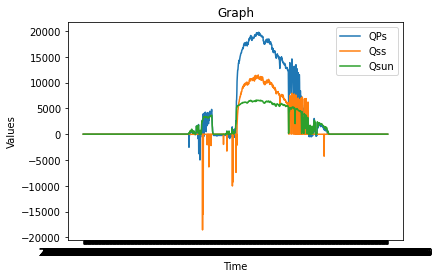

In [ ]:
#plot graph 
plt.title('Graph')
plt.xlabel('Time')
plt.ylabel('Values')
x=file['Time']
yqps=Qps;
yqss=Qss;
yqsun=Qsun;
plt.plot(x,yqps,label="QPs")
plt.plot(x,yqss,label="Qss")
plt.plot(x,yqsun,label="Qsun")
plt.legend()
plt.show()

In [ ]:
n1_inst=Qsun/Qps;
n2_inst=Qps/Qss;
print(n1_inst); 
print(n2_inst);


0       0.294249
1       0.299278
2       0.362037
3       0.349645
4       0.315452
          ...   
1433    0.400320
1434    0.357449
1435    0.444774
1436    0.405224
1437    0.380749
Length: 1438, dtype: float64
0      -0.887449
1      -2.094089
2      -2.019593
3      -2.118550
4      -2.980080
          ...   
1433   -0.836895
1434   -0.792027
1435   -0.753251
1436   -0.838380
1437   -0.637336
Length: 1438, dtype: float64


In [ ]:
pappu=1;

In [ ]:
#finding Qabs
from numpy.ma.core import sqrt
Tao=0.91;
α=0.95;
ρ=0.93;
w=
cos(theta)=sqrt(1-cos(del)*sin(w)**2);
Qabs=Qsun*cos(theta)*Tao*α*ρ

In [ ]:
#transfer Qss to excel
import pandas as pd
#print(Qss)
export=pd.DataFrame(Qss)

In [ ]:
export.to_excel("QssExport.xlsx")